Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

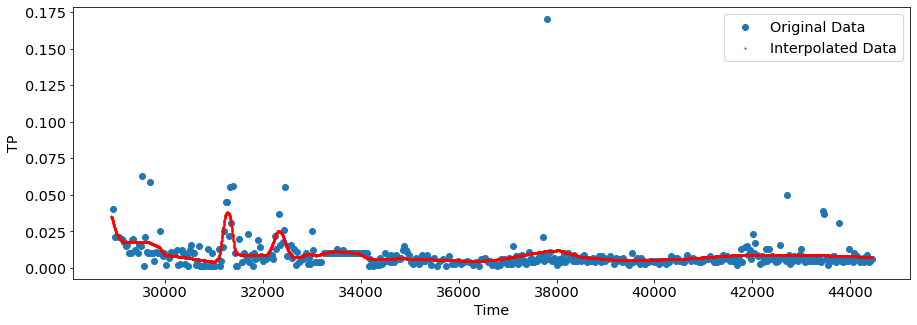

313/313 [==============================] - 0s 359us/step - loss: 9.7262e-18
['loss']


In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelBB09_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/BB09.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 28933.43                   
time_max = 44452.45                        

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [4]:
interpolation = model.predict([0.421003828
,0.424805614
,0.428736274
,0.432666933
,0.436597593
,0.440528253
,0.44452335
,0.448325136
,0.452255796
,0.456186455
,0.460117115
,0.464047775
,0.468042872
,0.471844658
,0.475775318
,0.479705977
,0.483636637
,0.487567297
,0.491562394
,0.495428617
,0.503289936
,0.830759006
])
interpolation

array([[0.02816201],
       [0.02773209],
       [0.02728763],
       [0.02684355],
       [0.02639948],
       [0.02595538],
       [0.02550402],
       [0.02507451],
       [0.02463041],
       [0.02418754],
       [0.02376125],
       [0.02333499],
       [0.02290169],
       [0.02248939],
       [0.0220631 ],
       [0.02197609],
       [0.02262632],
       [0.02349725],
       [0.02438244],
       [0.02527902],
       [0.02744296],
       [0.0467434 ]], dtype=float32)